# Creating final data for crop and fertilizer recommendation system

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
fertilizer_data_path = 'C:\\Users\\Lenovo\\Downloads\\semester-1\\prac\\data_preprocessing\\processed_data\\FertilizerData.csv'
merge_fert = pd.read_csv(fertilizer_data_path)

In [69]:
merge_fert.head()

,Unnamed: 0,Crop,N,P,K,pH
0,0,rice,80,40,40,5.50
1,1,rice,80,40,40,5.52
2,2,rice,80,40,40,5.54
3,3,rice,80,40,40,5.56
4,4,rice,80,40,40,5.58


In [70]:
del merge_fert['Unnamed: 0']

In [71]:
merge_fert.describe()

,N,P,K,pH
count,418.000000,418.000000,418.000000,418.000000
mean,50.454545,45.681818,48.181818,5.409091
std,35.523277,31.922068,50.570325,0.587768
min,20.000000,10.000000,10.000000,3.820000
25%,20.000000,20.000000,20.000000,5.320000
50%,30.000000,40.000000,30.000000,5.480000
75%,80.000000,60.000000,50.000000,5.620000
max,120.000000,125.000000,200.000000,6.680000


In [72]:
merge_fert['Crop'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

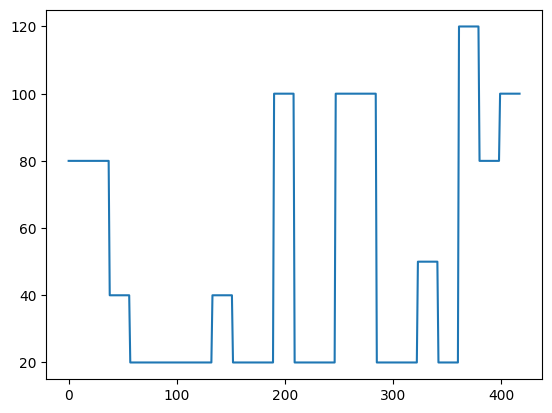

In [73]:
plt.plot(merge_fert["N"])

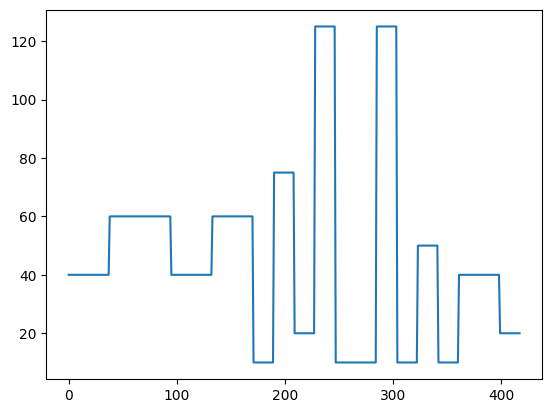

In [74]:
plt.plot(merge_fert["P"])

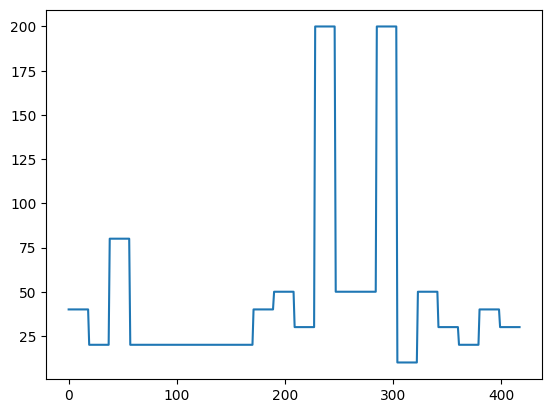

In [75]:
plt.plot(merge_fert["K"])

<Axes: >

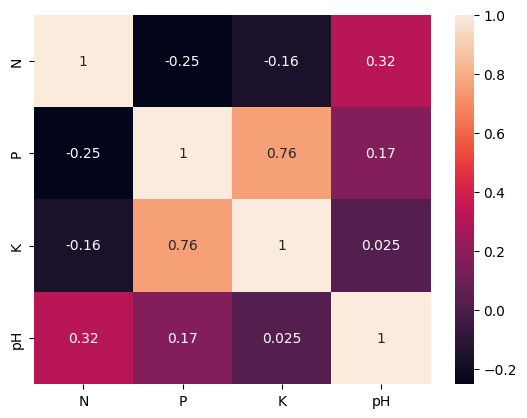

In [76]:
sns.heatmap(merge_fert.select_dtypes(include=['number']).corr(),annot=True)

In [77]:
merge_crop = pd.read_csv('C:\\Users\\Lenovo\\Downloads\\semester-1\\prac\\data_preprocessing\\processed_data\\MergeFileCrop.csv')
reco_fert = merge_fert

In [78]:
#Add +/-3 for every NPK value
import random
temp = pd.DataFrame(columns = ['N','P','K'])
for i in range(0,merge_crop.shape[0]):
    crop = merge_crop.label.iloc[i]
    #print(crop)
    N = reco_fert[reco_fert['Crop'] == crop]["N"].iloc[0] + random.randint(-20,20)
    P = reco_fert[reco_fert['Crop'] == crop]["P"].iloc[0] + random.randint(-5,20)
    K = reco_fert[reco_fert['Crop'] == crop]["K"].iloc[0] + random.randint(-5,5)
    d = {"N":N,"P":P,"K":K}
    #print(d)
    temp = pd.concat([temp, pd.DataFrame([d])], ignore_index=True)


In [79]:
temp

,N,P,K
0,75,51,39
1,76,57,42
2,81,51,35
3,62,39,39
4,74,39,42
...,...,...,...
2195,108,26,28
2196,114,35,31
2197,85,31,26
2198,101,15,31


In [80]:
merge_crop['N'] = temp['N']
merge_crop['P'] = temp['P']
merge_crop['K'] = temp['K']

In [81]:
merge_crop

,Unnamed: 0,temperature,humidity,ph,rainfall,label,N,P,K
0,0,20.879744,82.002744,6.502985,202.935536,rice,75,51,39
1,1,21.770462,80.319644,7.038096,226.655537,rice,76,57,42
2,2,23.004459,82.320763,7.840207,263.964248,rice,81,51,35
3,3,26.491096,80.158363,6.980401,242.864034,rice,62,39,39
4,4,20.130175,81.604873,7.628473,262.717340,rice,74,39,42
...,...,...,...,...,...,...,...,...,...
2195,2195,26.774637,66.413269,6.780064,177.774507,coffee,108,26,28
2196,2196,27.417112,56.636362,6.086922,127.924610,coffee,114,35,31
2197,2197,24.131797,67.225123,6.362608,173.322839,coffee,85,31,26
2198,2198,26.272418,52.127394,6.758793,127.175293,coffee,101,15,31


In [82]:
del merge_crop['Unnamed: 0']

In [83]:
merge_crop

,temperature,humidity,ph,rainfall,label,N,P,K
0,20.879744,82.002744,6.502985,202.935536,rice,75,51,39
1,21.770462,80.319644,7.038096,226.655537,rice,76,57,42
2,23.004459,82.320763,7.840207,263.964248,rice,81,51,35
3,26.491096,80.158363,6.980401,242.864034,rice,62,39,39
4,20.130175,81.604873,7.628473,262.717340,rice,74,39,42
...,...,...,...,...,...,...,...,...
2195,26.774637,66.413269,6.780064,177.774507,coffee,108,26,28
2196,27.417112,56.636362,6.086922,127.924610,coffee,114,35,31
2197,24.131797,67.225123,6.362608,173.322839,coffee,85,31,26
2198,26.272418,52.127394,6.758793,127.175293,coffee,101,15,31


In [84]:
merge_crop = merge_crop[[ 'N', 'P', 'K','temperature', 'humidity', 'ph', 'rainfall', 'label']]

In [85]:
merge_crop.to_csv("crop_recommendation.csv",index=False)

In [86]:
# Checking if everything went fine
df = pd.read_csv('crop_recommendation.csv')

In [87]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,75,51,39,20.879744,82.002744,6.502985,202.935536,rice
1,76,57,42,21.770462,80.319644,7.038096,226.655537,rice
2,81,51,35,23.004459,82.320763,7.840207,263.964248,rice
3,62,39,39,26.491096,80.158363,6.980401,242.864034,rice
4,74,39,42,20.130175,81.604873,7.628473,262.717340,rice


In [88]:
df.shape

(2200, 8)